In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse
from matplotlib import cm
import matplotlib as mpl
import scipy.stats
from sklearn.metrics import explained_variance_score


In [2]:
full_pred_post = np.load("/scratch/yjk27/CA1_clust4-60_AP/comb_pred/gru_l20_h40_0.2ms_V_test_joint_output.npz")["test"]
full_pred_pre = np.load("/scratch/yjk27/CA1_clust4-60_AP/comb_pred/gru_l20_h40_0.2ms_V_test_pre_joint_output.npz")["test"]
full_true = np.load("/scratch/yjk27/CA1_clust4-60_AP/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[-20:,:50000]
full_ap = np.load("/scratch/yjk27/CA1_clust4-60_AP/data/V_diff_stimseed1.npy")[-20*50000:].reshape(-1,50000)
offset = np.mean(np.load("/scratch/yjk27/CA1_clust4-60_noNA/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1_set1.npy"))
post_error = full_true - full_pred_post - offset
pre_error = full_true - full_pred_pre - offset
full_pred_post += offset
full_pred_pre += offset

In [3]:
thresh_bin_no = 250

full_means = np.zeros((thresh_bin_no, 3))
full_stds = np.zeros((thresh_bin_no, 3))
full_bins = np.linspace(np.min(full_true), np.max(full_true), thresh_bin_no+1)

for i in range(thresh_bin_no):
    full_idx = np.where((full_true.flatten() >= full_bins[i]) & (full_true.flatten() < full_bins[i+1]))[0]
    full_means[i,1] = np.mean(full_pred_pre.flatten()[full_idx])
    full_means[i,2] = np.mean(full_pred_post.flatten()[full_idx])
    full_means[i,0] = (full_bins[i] + full_bins[i+1])/2
    
    full_stds[i,0] = (full_bins[i] + full_bins[i+1])/2
    full_stds[i,1] = np.std(full_pred_pre.flatten()[full_idx])
    full_stds[i,2] = np.std(full_pred_post.flatten()[full_idx])
    

<ipython-input-8-b025c999ac64>:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/scratch/yjk27/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  fig.canvas.print_figure(bytes_io, **kw)


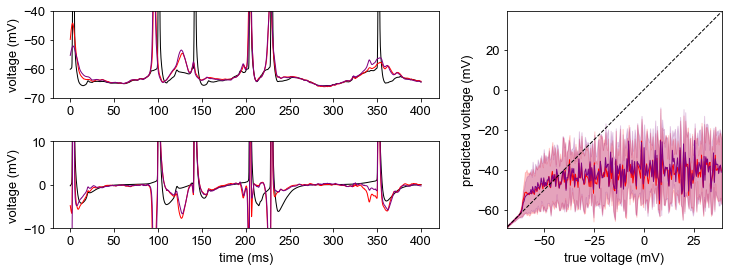

In [8]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.size'] = '13'

trial = 4

fig = plt.figure(constrained_layout=True, figsize = (12,4))
gs = fig.add_gridspec(2,12, wspace=0.25, hspace=0.5)
ax1 = fig.add_subplot(gs[0,:7])
ax2 = fig.add_subplot(gs[1,:7])
ax3 = fig.add_subplot(gs[:,8:])

ax1.plot(np.arange(0,400,0.2), full_true[trial,24000:26000], linewidth=1, color="black")
ax1.plot(np.arange(0,400,0.2), full_pred_post[trial,24000:26000], linewidth=1, color="red")
ax1.plot(np.arange(0,400,0.2), full_pred_pre[trial,24000:26000], linewidth=1, color="purple")
ax1.set_ylim(-70,-40)

ax2.plot(np.arange(0,400,0.2), full_ap[trial,24000:26000], linewidth=1, color="black")
ax2.plot(np.arange(0,400,0.2), pre_error[trial,24000:26000], linewidth=1, color="red")
ax2.plot(np.arange(0,400,0.2), post_error[trial,24000:26000], linewidth=1, color="purple")
ax2.set_ylim(-10,10)

ax2.set_xlabel("time (ms)")
ax1.set_ylabel("voltage (mV)")
ax2.set_ylabel("voltage (mV)")

ax3.plot(full_means[:,0],full_means[:,1], linewidth=1, color="red")
ax3.plot(full_means[:,0],full_means[:,2], linewidth=1, color="purple")
ax3.fill_between(full_means[:,0], full_means[:,1]-full_stds[:,1],
                 full_means[:,1]+full_stds[:,1], color="red", alpha=0.2)
ax3.fill_between(full_means[:,0], full_means[:,2]-full_stds[:,2],
                 full_means[:,2]+full_stds[:,2], color="purple", alpha=0.2)
ax3.plot(full_means[:,0], full_means[:,0], linewidth=1, color="black", linestyle="--")
ax3.margins(x=0.005, y=0.005)
ax3.set_xlabel("true voltage (mV)")
ax3.set_ylabel("predicted voltage (mV)")
#ax3.legend(loc="upper left", fontsize=8, frameon=False)
#ax3.set_xticks(np.arange(-68,-55.9,4))
#ax3.set_yticks(np.arange(-68,-55.9,4))
#ax3.set_xlim(-68,-55.8)
#ax3.set_ylim(-68,-55.8)

fig.tight_layout()
#plt.show()
#plt.savefig("/scratch/yjk27/dendrite/fig_full/fig_full_raw.pdf", bbox_inches="tight", transparent=True)

In [9]:
post_corr = np.corrcoef(full_true.flatten(), full_pred_post.flatten())[0,1]
pre_corr = np.corrcoef(full_true.flatten(), full_pred_pre.flatten())[0,1]

0.4765432255259937 0.5001335389601204
